This notebook demonstrates the combination of random sparsification and tail-averaging Kaczmarz, when applied to an inconsistent system.

In [35]:
import sys

sys.path.append("../rss")

from solvers import rk

from sparsifiers import *

import numpy as np

import matplotlib.pyplot as plt

In [36]:
# set up Ax = b, where the system is inconsistent 

m = 4096

n = 1024

A = np.random.rand(m, n)

b = np.random.rand(m)

# compute the least square solution

x_true = np.linalg.lstsq(A, b)[0]


/var/folders/89/cmkxgs714ss6xl1nw7t10x3c0000gn/T/ipykernel_32864/2533175425.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_true = np.linalg.lstsq(A, b)[0]


In [37]:
# solve the least square problems with tail averaging and random sparsification 

s = 50

T = 50000

err_rs = np.zeros(T)

x_hat = np.random.rand(n) # for storing the sparsified iterates

x_sol = np.zeros(n) # for storing the tail-averaged solution

for t in range(T):

    sparse_x = pivotal(x_hat, s)

    x_hat = rk(A, sparse_x, b)

    x_sol = (x_sol*t + x_hat) / (t + 1)

    err_rs[t] = np.linalg.norm(x_sol - x_true)

# output the final error
err_rs[T-1]


1.494638712593679

In [38]:
# solve the least square problems with tail averaging and hard thresholding

s = 50

T = 50000

err_ht = np.zeros(T)

x_hat = np.random.rand(n) # for storing the sparsified iterates

x_sol = np.zeros(n) # for storing the tail-averaged solution

for t in range(T):

    sparse_x = hthresholding(x_hat, s)

    x_hat = rk(A, sparse_x, b)

    x_sol = (x_sol*t + x_hat) / (t + 1)

    err_ht[t] = np.linalg.norm(x_sol - x_true)

# output the final error
err_ht[T-1]


0.5647188511277635

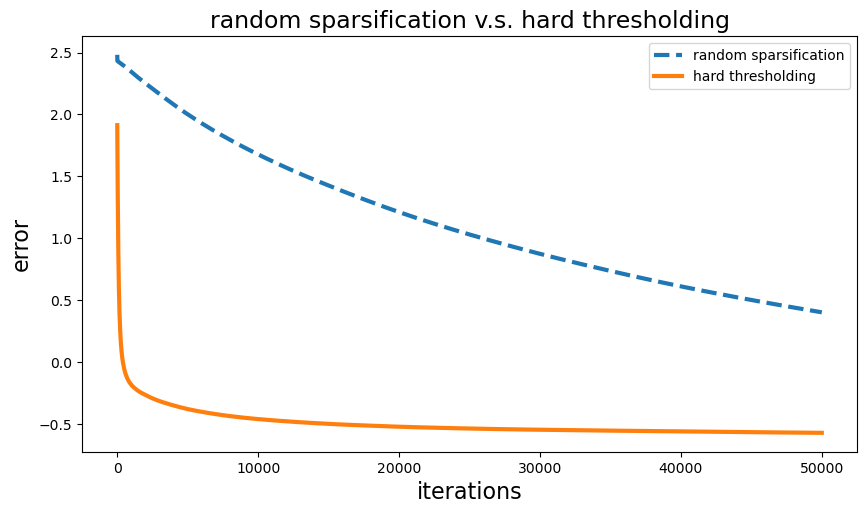

In [39]:
fig, ax = plt.subplots(figsize = (10, 5.4))

ax.plot(np.log(err_rs), label = "random sparsification", linewidth = 3, linestyle = "--")

ax.plot(np.log(err_ht), label = "hard thresholding", linewidth = 3)

ax.set_title("random sparsification v.s. hard thresholding", fontsize = 17)

ax.set_xlabel("iterations", fontsize = 16)

ax.set_ylabel("error", fontsize = 16)

ax.legend()

plt.savefig("script_1")

